# Previsão de acoes

In [3]:
import pandas as pd

In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras.models import Sequential

In [6]:
from tensorflow.keras.layers import Dense, Input, SimpleRNN

In [7]:
from tensorflow.keras.optimizers import Adam

In [8]:
import numpy as np

In [9]:
from sklearn.preprocessing import normalize

In [66]:
import matplotlib.pyplot as plt

In [10]:
# Abrir o arquivo para leitura

In [12]:
df = pd.read_csv("./PETR4.SA.csv")

In [72]:
# Y_real = []
# for index, row in df.iterrows():
#     Y_real.append( row['Close'] )
# Y_real = np.array(Y_real)
# Y_real.shape

In [73]:
X = df[["Open", "High", "Low"]]
# X = normalize(X)
X=np.array(X)
X.shape

(251, 3)

In [74]:
bloco = 10

In [85]:
features_X = []
Y = []
for i in range(25):
    features_X.append(X[i: i+10, 0])
    Y.append(X[i+10+1, 0])

In [92]:
Y = np.array(Y).reshape( (-1, 1) )

In [86]:
features_X = np.array(features_X)

In [93]:
Y

array([[25.58    ],
       [26.059999],
       [26.110001],
       [26.6     ],
       [25.59    ],
       [26.08    ],
       [25.879999],
       [25.65    ],
       [26.25    ],
       [26.799999],
       [26.809999],
       [26.75    ],
       [26.719999],
       [26.27    ],
       [26.299999],
       [27.43    ],
       [27.540001],
       [27.450001],
       [28.65    ],
       [29.1     ],
       [30.219999],
       [29.24    ],
       [28.940001],
       [30.200001],
       [29.23    ]])

In [78]:
# plt.plot(df["Open"])

In [79]:
# X = []
# for index, row in df.iterrows():
#    X.append([row['Open'], row['Close'], row['High'], row['Low'], row['Adj Close'], row['Volume']])

In [102]:
modelo = Sequential()
modelo.add( Input( (25, 1, ) ) )
modelo.add( SimpleRNN( 10, return_sequences=True) )
modelo.add( SimpleRNN( 10, return_sequences=True) )
modelo.add( SimpleRNN( 10) )
modelo.add( Dense( 1 ) ) 
modelo.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_33 (SimpleRNN)            │ (None, 25, 10)              │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_34 (SimpleRNN)            │ (None, 25, 10)              │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_35 (SimpleRNN)            │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 551 (2.15 KB)

 Trainable params: 551 (2.15 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
adam = Adam(learning_rate=0.01)
modelo.compile(optimizer=adam, loss="mean_squared_error", metrics=["Accuracy"])

In [104]:
hist = modelo.fit(features_X, Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - Accuracy: 0.0000e+00 - loss: 685.0662
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - Accuracy: 0.0000e+00 - loss: 655.0121
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - Accuracy: 0.0000e+00 - loss: 638.9797
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - Accuracy: 0.0000e+00 - loss: 623.3457
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - Accuracy: 0.0000e+00 - loss: 609.3083
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - Accuracy: 0.0000e+00 - loss: 596.8918
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - Accuracy: 0.0000e+00 - loss: 585.8342
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - Accuracy: 0.0000e+00 - loss: 575.9564
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - Accuracy: 0.0000e+00 - loss: 567.1248
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - Accuracy: 0.0000e+00 - loss: 559.1888
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - Accuracy: 0.0000e+00 - loss: 551.9787
Epoch 12/1

In [105]:
Y_hat = modelo.predict( features_X )
Y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step


array([[13.139425],
       [13.139423],
       [13.139425],
       [13.139425],
       [13.139425],
       [13.139425],
       [13.139425],
       [13.139425],
       [13.139425],
       [13.139425],
       [13.139426],
       [13.139427],
       [13.139425],
       [13.139425],
       [13.139425],
       [13.139425],
       [13.139426],
       [13.139427],
       [13.139425],
       [13.139427],
       [13.139427],
       [13.139428],
       [13.139427],
       [13.139427],
       [13.139427]], dtype=float32)

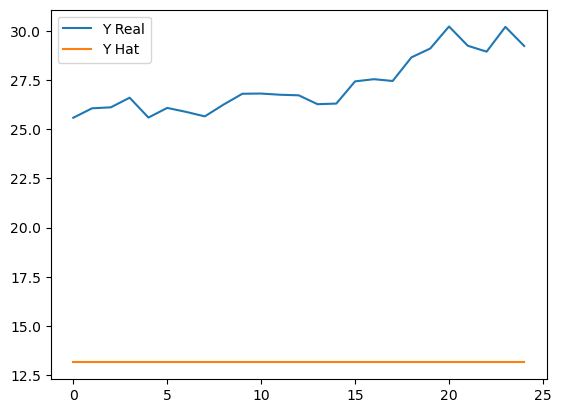

In [106]:
plt.plot(Y, label="Y Real")
plt.plot(Y_hat, label="Y Hat")
plt.legend()
plt.show()

In [39]:
print(modelo.predict(np.array([X[10]])))
print(modelo.predict(np.array([X[100]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
[[34.271374]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[34.271374]]
